# **Business Decision Modeling Group Project**

Summary: This project identifies the best portfolio using diverse methods such as Buy and hold strategy, Momentum Trading and Optimization model using Pyomo. We used Materials Sector, Consumer Discretionary Sector, Industrials Sector.

Team members: Chanju Oh, Dmytro Andriyenko, Trang Nguyen



# Import library

In [ ]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tabulate import tabulate

# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
!pip install tabulate
import yahoo_fin.stock_info as si



# 1 - Data Prep and EDA

## 1.1 Select 10 stocks per sector
Materials Sector/ Consumer Discretionary Sector/ Industrials Sector

In [ ]:
# Assign the ticker list that we want to scrap
tickers_list = ['AMCR', 'DD', 'FCX', 'IFF', 'NEM', 'NUE', 'PKG', 'SHW', 'FMC', 'ECL', 'HAS', 'AMZN', 'DPZ', 'ETSY', 'LULU', 'NKE', 'SBUX', 'TSLA', 'WYNN', 'TJX','ADP','BA','CAT','DE','DAL','EFX','HON','J','LMT','URI']
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2022',interval='1d') for ticker in tickers_list}

In [ ]:
# take a look at the stock prices for the given time period!
dow_prices

In [ ]:
# Extract adjclose from the prices and create the prep_data DataFrame
prep_data = pd.DataFrame({ticker: dow_prices[ticker]['close'] for ticker in tickers_list})
prep_data.columns = tickers_list  # Rename columns to match ticker symbols

prep_data

,AMCR,DD,FCX,IFF,NEM,NUE,PKG,SHW,FMC,ECL,...,ADP,BA,CAT,DE,DAL,EFX,HON,J,LMT,URI
2017-01-03,10.63,81.980339,13.780000,117.169998,34.630001,59.610001,85.000000,91.513336,49.462273,118.040001,...,103.500000,156.970001,93.989998,104.050003,49.480000,118.760002,111.352638,58.150002,253.309998,109.309998
2017-01-04,10.63,82.635040,14.830000,117.389999,34.959999,61.250000,86.370003,92.133331,50.485691,118.790001,...,103.660004,158.619995,93.570000,105.820000,50.700001,119.339996,111.659348,58.779999,253.990005,109.870003
2017-01-05,10.63,82.264992,14.620000,116.099998,36.570000,60.900002,85.330002,92.059998,50.676495,118.610001,...,103.040001,158.710007,93.000000,105.349998,49.730000,119.980003,111.908539,58.560001,255.979996,110.150002
2017-01-06,10.63,81.752617,14.900000,116.019997,35.419998,60.290001,87.199997,92.996666,50.581093,118.919998,...,103.110001,159.100006,93.040001,106.489998,49.680000,121.000000,113.604996,57.980000,257.850006,109.379997
2017-01-09,10.63,82.250755,14.680000,115.559998,35.360001,59.639999,87.769997,92.919998,50.260193,118.839996,...,102.470001,158.320007,92.370003,105.190002,49.689999,119.839996,112.665718,56.740002,257.809998,106.160004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,12.06,68.730003,38.099998,103.900002,47.849998,136.080002,128.699997,242.669998,126.339996,144.539993,...,240.940002,189.059998,239.869995,436.929993,33.160000,195.729996,213.869995,120.860001,483.290009,355.220001
2022-12-27,12.08,68.779999,38.880001,103.800003,48.750000,136.539993,129.559998,239.419998,126.540001,145.449997,...,241.029999,189.399994,243.139999,436.149994,32.900002,194.339996,214.889999,121.129997,485.500000,358.679993
2022-12-28,11.91,67.800003,37.880001,103.050003,47.369999,134.190002,127.010002,237.479996,124.660004,143.800003,...,237.850006,188.380005,239.380005,430.179993,31.990000,190.199997,212.190002,119.199997,483.220001,351.880005
2022-12-29,12.02,68.580002,38.310001,105.120003,47.360001,133.559998,128.630005,241.320007,124.940002,147.710007,...,240.619995,188.910004,240.199997,428.640015,32.730000,196.789993,214.750000,121.129997,487.049988,356.209991


Looks good! now we have a solid dataset comprised of adjclose price of each date (01/01/2017 to 12/31/2022) of all the stocks! The shape of dataset is 1510 rows × 30 columns (as it shown on the bottom of the table)

In [ ]:
# Rather than using the raw data from the stock market, we will use percentage return based on the previous day.
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change() # return dataset now shows percentage change
# and drop any missing values.
return_data.dropna(inplace=True)
return_data # check the work

,AMCR,DD,FCX,IFF,NEM,NUE,PKG,SHW,FMC,ECL,...,ADP,BA,CAT,DE,DAL,EFX,HON,J,LMT,URI
2017-01-04,0.000000,0.007986,0.076197,0.001878,0.009529,0.027512,0.016118,0.006775,0.020691,0.006354,...,0.001546,0.010512,-0.004469,0.017011,0.024656,0.004884,0.002754,0.010834,0.002684,0.005123
2017-01-05,0.000000,-0.004478,-0.014160,-0.010989,0.046053,-0.005714,-0.012041,-0.000796,0.003779,-0.001515,...,-0.005981,0.000567,-0.006092,-0.004442,-0.019132,0.005363,0.002232,-0.003743,0.007835,0.002548
2017-01-06,0.000000,-0.006228,0.019152,-0.000689,-0.031447,-0.010016,0.021915,0.010175,-0.001883,0.002614,...,0.000679,0.002457,0.000430,0.010821,-0.001005,0.008501,0.015159,-0.009904,0.007305,-0.006991
2017-01-09,0.000000,0.006093,-0.014765,-0.003965,-0.001694,-0.010781,0.006537,-0.000824,-0.006344,-0.000673,...,-0.006207,-0.004903,-0.007201,-0.012208,0.000201,-0.009587,-0.008268,-0.021387,-0.000155,-0.029439
2017-01-10,0.000000,-0.002076,0.059264,-0.000692,-0.007919,0.026492,0.002393,0.000430,-0.004314,-0.008246,...,-0.002635,0.004737,0.015806,-0.002852,0.024955,0.001669,0.002552,0.009693,-0.006361,0.025810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.006678,0.017469,0.011415,0.005711,0.007368,-0.006062,0.010125,0.005678,0.013395,0.010416,...,0.007443,0.004303,0.009809,0.002455,0.007290,0.007775,0.007348,0.008175,0.008325,0.012369
2022-12-27,0.001658,0.000727,0.020473,-0.000962,0.018809,0.003380,0.006682,-0.013393,0.001583,0.006296,...,0.000374,0.001798,0.013632,-0.001785,-0.007841,-0.007102,0.004769,0.002234,0.004573,0.009740
2022-12-28,-0.014073,-0.014248,-0.025720,-0.007225,-0.028308,-0.017211,-0.019682,-0.008103,-0.014857,-0.011344,...,-0.013193,-0.005385,-0.015464,-0.013688,-0.027660,-0.021303,-0.012565,-0.015933,-0.004696,-0.018958
2022-12-29,0.009236,0.011504,0.011352,0.020087,-0.000211,-0.004695,0.012755,0.016170,0.002246,0.027191,...,0.011646,0.002813,0.003425,-0.003580,0.023132,0.034648,0.012065,0.016191,0.007926,0.012305


In [ ]:
return_data.shape

(1509, 30)

Now the return_data is comprised of percentage change based on the previous day. Also we dropped any missing values, and after that the dataset became 1509 rows × 30 columns. We only had 1 row that is missing!

##Split Data

In [ ]:
#Declare the last date of train data and the first date of the test data
end_date_train = '2021-12-31'
start_date_test = '2022-01-01'

# Subset the data for training
train_data = return_data.loc[:end_date_train]

# Subset the data for testing
test_data = return_data.loc[start_date_test:]

# Print the shapes of the train and test datasets
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (1258, 30)
Test Data Shape: (251, 30)


## 1.2 One time-series visualization per sector

### Materials Sector

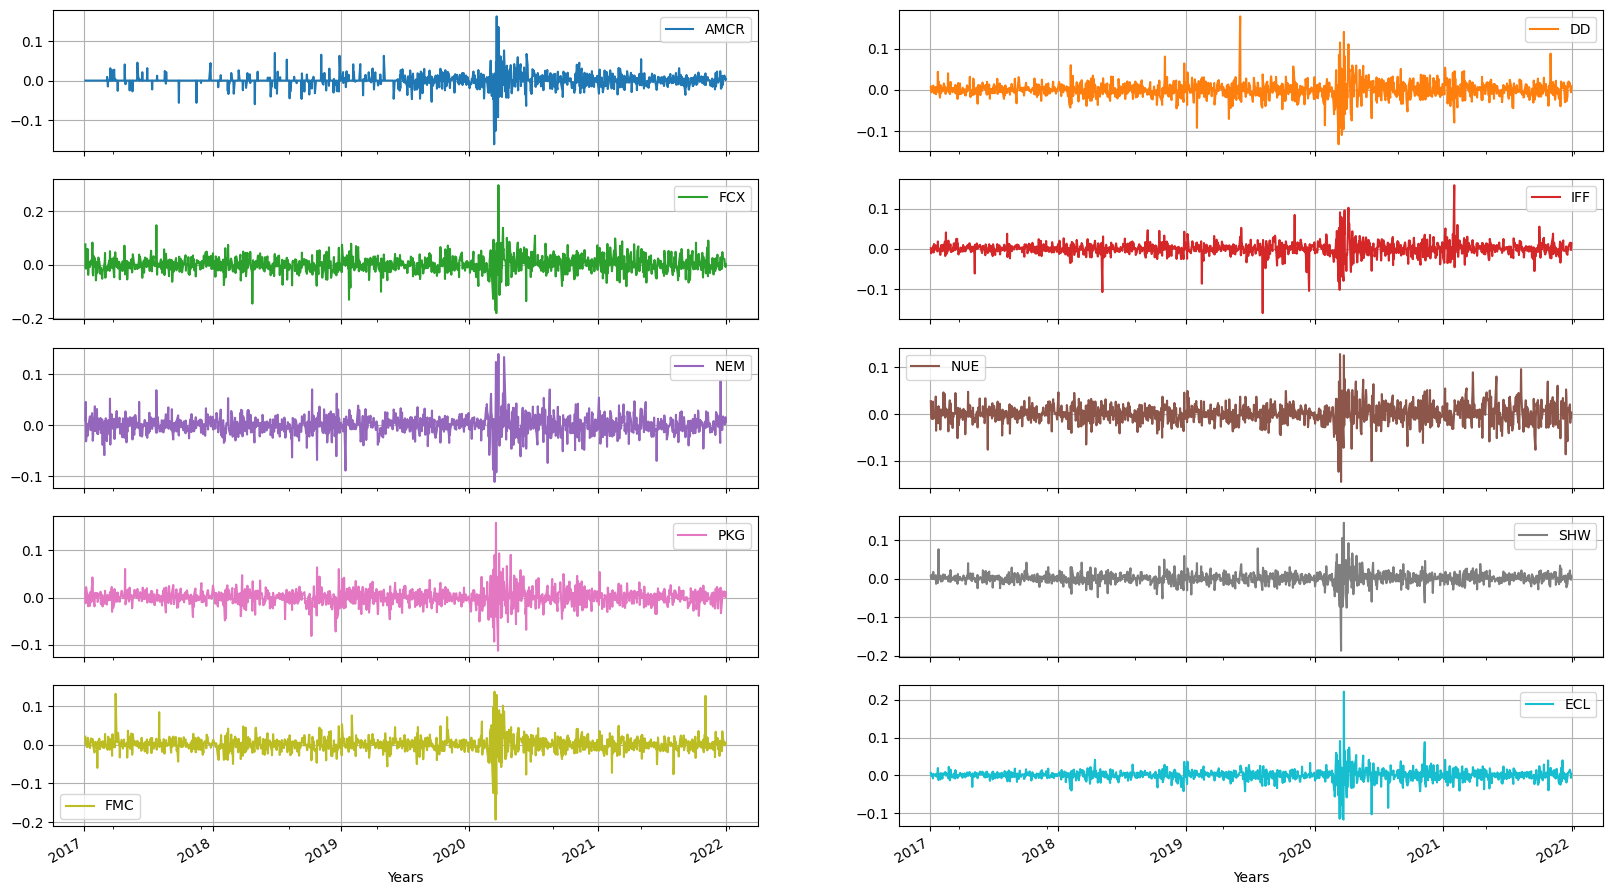

In [ ]:
materials = train_data.iloc[:,:10] # first 10 columns
materials.plot(subplots=True, grid=True, xlabel = 'Years', layout=(5,2), figsize=(20,12))
plt.show()

### Consumer Discretionary Sector

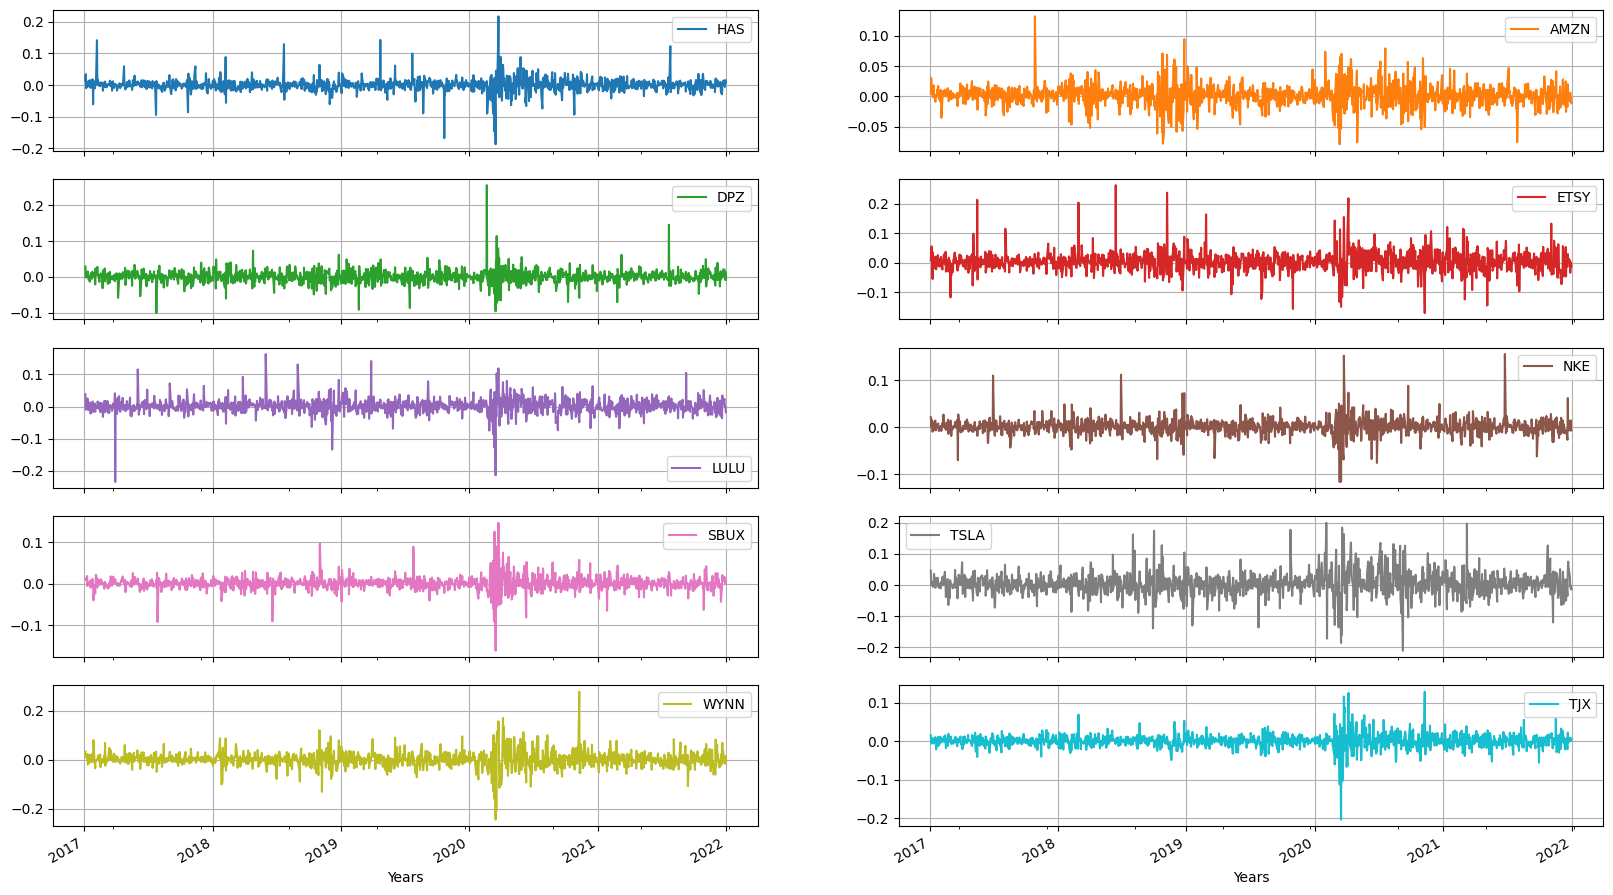

In [ ]:
consumer = train_data.iloc[:,10:20] # columns in the middle
consumer.plot(subplots=True, grid=True, xlabel = 'Years', layout=(5,2), figsize=(20,12))
plt.show()

### Industrials Sector

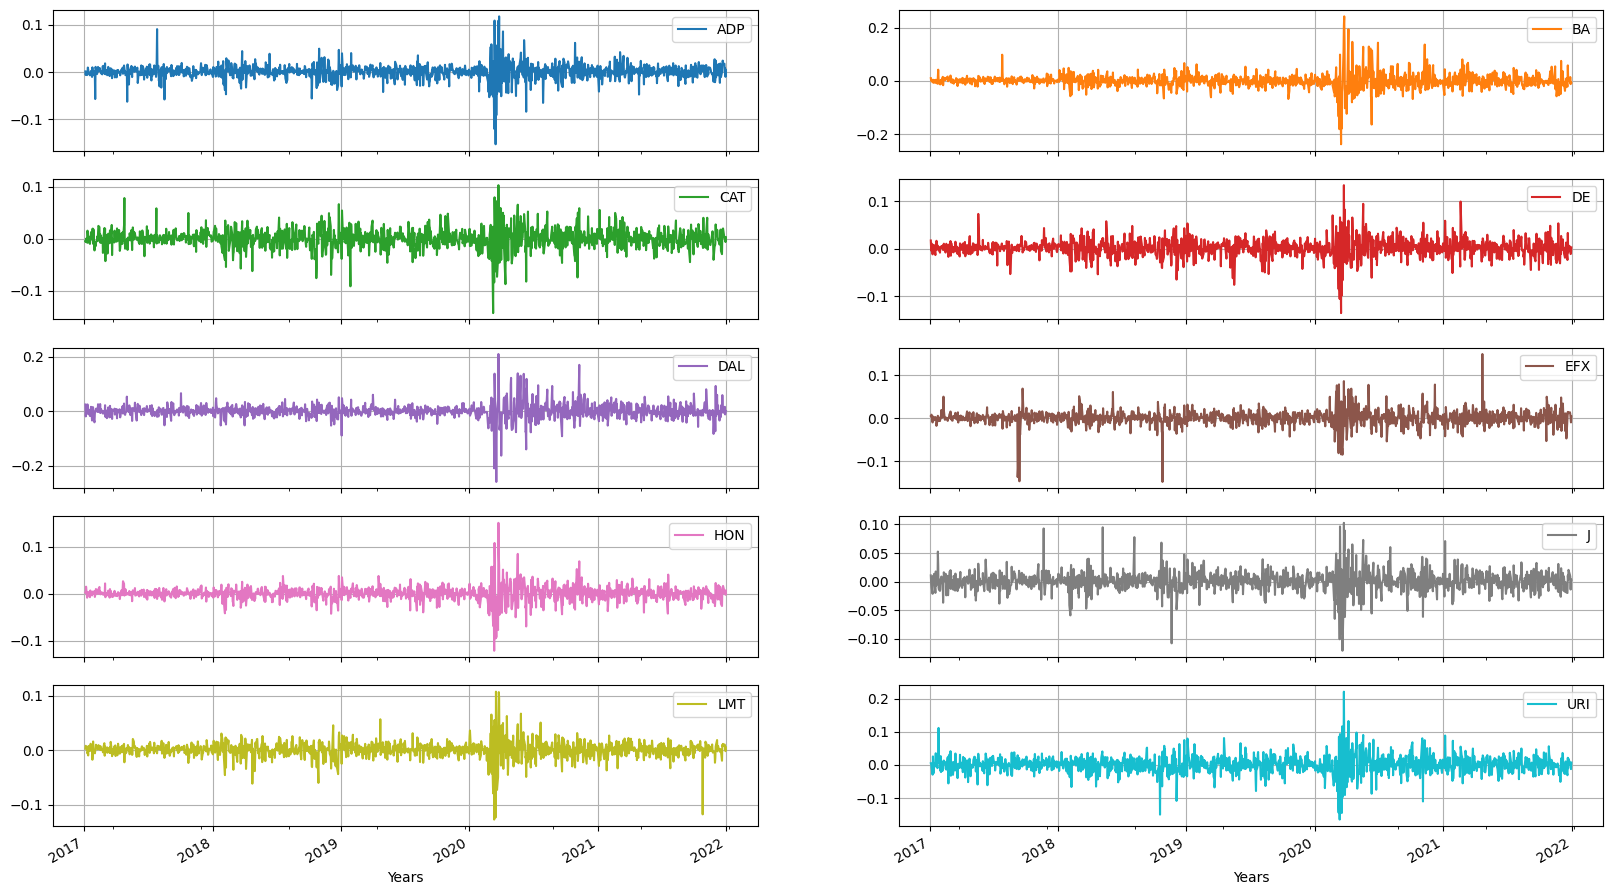

In [ ]:
industrials = train_data.iloc[:,-10:] # the last 10 columns

industrials.plot(subplots=True, grid=True, xlabel = 'Years', layout=(5,2), figsize=(20,12))
plt.show()

## 1.3 Discussion of the visualization plot (e.g., volatility over time).



*   Materials - 2020 seemed to be crashing for all of the stocks in materials sector. As we all know, it was the year of COVID! FMC for example, had the lowest return rate of -0.20 among those stocks. Around 2020, all of the stocks' return fluctuates a lot. Among the stocks, I see FCX and ECL had the highest return rate (around 0.20 to 0.30) around early 2020.
*   Consumer Discretionary - Tesla seems to be the most volatile stock. DPZ once almost hit 0.25 return and WYNN once almost hit 0.3 which is quite great. Except for TJX, almost all of the stocks seems return rate is at the highest is aroung 0.15 to 0.30
* Industrials - Overall, all of the stocks seems to be stable until 2020. CAT seems to be the most volatile stock. All of the stocks doesn't look like it reach close to 0.30 return. At the same time, the lowest return (negative) seems to be more than -0.20.



# 2 - Momentum Trading for Stock Selection

## 2.1 Momentum Trading Function

> Indented block



In [ ]:
def momentum_trading_strategy(tickers, short_window, long_window, start_date, end_date):
    results = []  # empty list
    # Set up the figure outside the loop
    plt.figure(figsize=(12, 8))
    for ticker in tickers:
        # Retrieve stock data
        stock = si.get_data(ticker, start_date, end_date, interval='1d')

        # Generate list of trading days
        day = np.arange(1, len(stock) + 1)
        stock['Day'] = day

        # Drop columns not used
        stock.drop(columns=['Day', 'open', 'high', 'low', 'adjclose', 'volume', 'ticker'], inplace=True)

        # Calculate moving averages
        stock['short_window'] = stock['close'].rolling(short_window).mean().shift()
        stock['long_window'] = stock['close'].rolling(long_window).mean().shift()
        stock.dropna(inplace=True)

        # Calculate log returns
        stock['logClose'] = np.log(stock['close'])
        stock['return'] = stock['logClose'].diff()

        # Generate buy/sell signals
        stock['invested'] = np.where(stock['short_window'] > stock['long_window'], 1, 0)
        stock['signal'] = stock['invested'].diff()
        stock.iloc[0, stock.columns.get_loc('signal')] = 1.0

        # Calculate system returns
        stock['system_return'] = stock['invested'] * stock['return']

        # Calculate cumulative returns for both strategies
        stock['buy_hold_cumulative'] = np.exp(stock['return']).cumprod()
        stock['system_cumulative'] = np.exp(stock['system_return']).cumprod()

        # Calculate and print final values for each stock
        value_system = np.exp(np.sum(stock['system_return'])) - 1
        value_buy_hold = np.exp(np.sum(stock['return'])) - 1
        # Plot performance for each stock
        plt.plot(stock['system_cumulative'], label=f'{ticker} (System)')

        # Append the results to the list
        results.append({
            'ticker': ticker,
            'value_system': value_system,
            'value_buy_hold': value_buy_hold
        })


    results_df = pd.DataFrame(results)


    # Finalize the plot
    plt.title('Stock Performance')
    plt.xlabel('Trading Days')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True, alpha=.3)
    plt.show()

    # Create and return results DataFrame based on the specified output
    return results_df

### Add stock tickers to training/test data

In [ ]:
def add_stock_to_tickers(stock_symbol):
    print(f"Adding {stock_symbol} to the tickers list.")
    tickers_list.append(stock_symbol)
    dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2022',interval='1d') for ticker in tickers_list}
    # Extract adjclose from the prices and create the prep_data DataFrame
    prep_data = pd.DataFrame({ticker: dow_prices[ticker]['adjclose'] for ticker in tickers_list})
    prep_data.columns = tickers_list  # Rename columns to match ticker symbols
    # Rather than using the raw data from the stock market, we will use percentage return based on the previous day.
    return_data = pd.DataFrame()
    for i in tickers_list:
      return_data[i] = prep_data[i].pct_change() # return dataset now shows percentage change
    # and drop any missing values.
    return_data.dropna(inplace=True)

    return return_data

## 2.2 plot the performance of the 8-21 Momentum Trading Strategy for each stock

For each sector, you must plot the performance of the 8-21 Momentum Trading Strategy for each stock (i.e., one plot with ten curves, one per stock). More precisely, we want to see how the investment in each stock changed over time (like a traditional stock performance curve). Note that this plot differs from the ones in the Momentum Trading notebook!

### Materials Sector

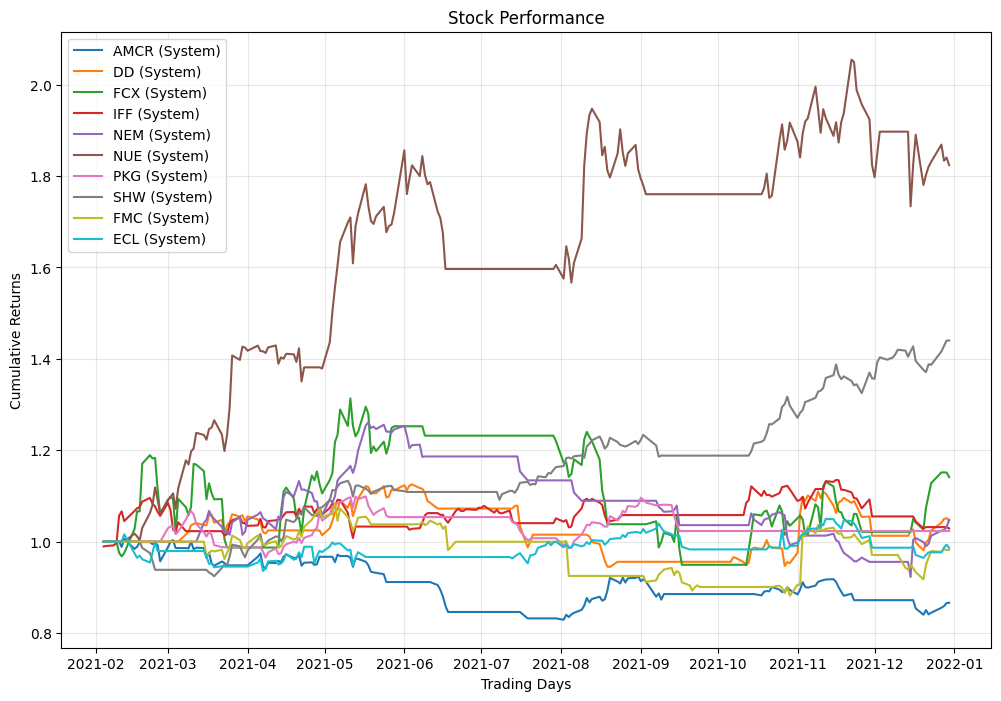

,ticker,value_system,value_buy_hold
0,AMCR,-0.133723,0.086285
1,DD,0.045432,0.069255
2,FCX,0.141440,0.425342
3,IFF,0.028944,0.158182
4,NEM,0.048040,0.045493
5,NUE,0.823893,1.203833
6,PKG,0.023325,-0.007151
7,SHW,0.440062,0.498674
8,FMC,-0.018116,-0.011298
9,ECL,-0.013449,0.119826


In [ ]:
materials_result= momentum_trading_strategy(materials,
                          short_window = 8,
                          long_window = 21,
                          start_date =  '01/01/2021',
                          end_date= '12/31/2021')
materials_result

### Consumer Discretionary Sector

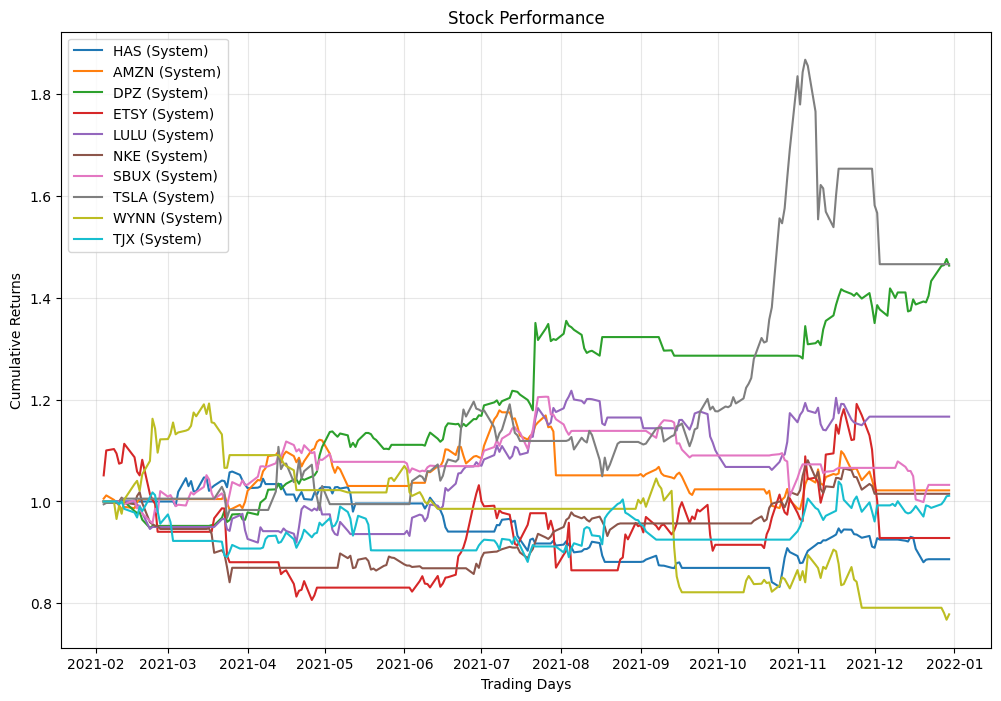

,ticker,value_system,value_buy_hold
0,HAS,-0.113323,0.046839
1,AMZN,0.021834,0.018222
2,DPZ,0.462936,0.493076
3,ETSY,-0.071674,0.056838
4,LULU,0.166542,0.199464
5,NKE,0.015120,0.208180
6,SBUX,0.032612,0.150663
7,TSLA,0.465800,0.252314
8,WYNN,-0.221510,-0.205405
9,TJX,0.011248,0.131875


In [ ]:
consumer_result =  momentum_trading_strategy(consumer,
                                             short_window = 8,
                                             long_window = 21,
                                             start_date =  '01/01/2021',
                                             end_date= '12/31/2021')

consumer_result

### Industrials Sector

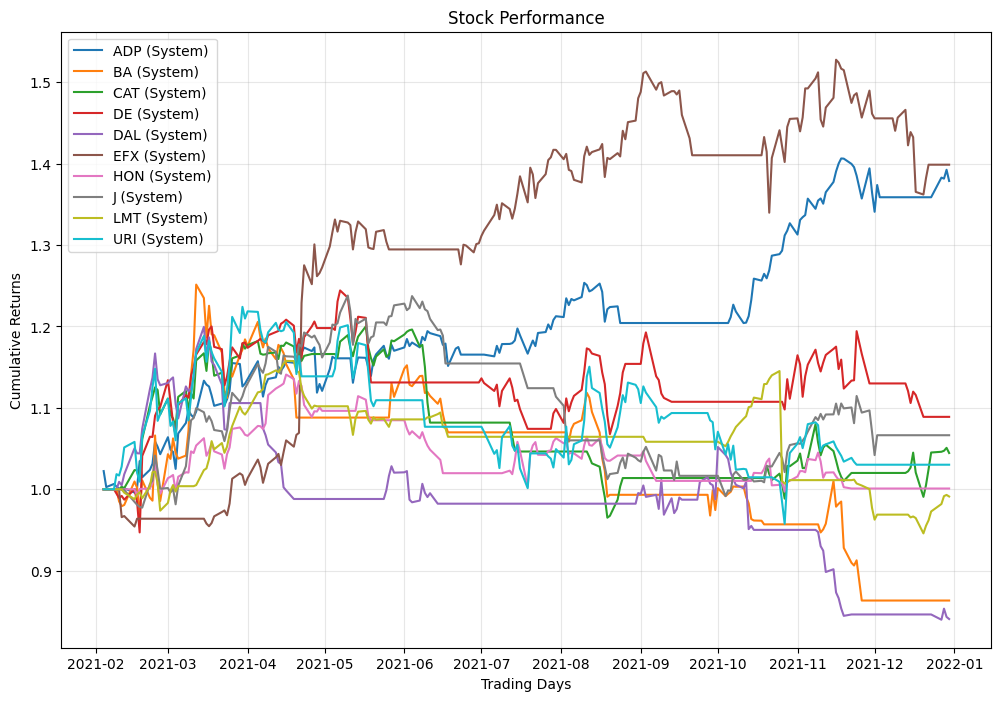

,ticker,value_system,value_buy_hold
0,ADP,0.378577,0.471917
1,BA,-0.136585,-0.022566
2,CAT,0.044547,0.076417
3,DE,0.088940,0.135784
4,DAL,-0.159290,-0.018602
5,EFX,0.398561,0.630628
6,HON,0.000951,0.040022
7,J,0.066387,0.308606
8,LMT,-0.008850,0.063750
9,URI,0.030179,0.315351


In [ ]:
industrials_result = momentum_trading_strategy(industrials,
                                             short_window = 8,
                                             long_window = 21,
                                             start_date =  '01/01/2021',
                                             end_date= '12/31/2021',
                                              )

industrials_result

## 2.3 Conclusion

Present a conclusion for each sector and mention explicitly the top-three performing stocks of each sector; nine stocks will be mentioned in this discussion (-3 pts if this discussion is missing).

In [ ]:
#Get the top 3 stocks for Materials
materials_result.sort_values(by=['value_system'],ascending= False)[0:3]

,ticker,value_system,value_buy_hold
5,NUE,0.823893,1.203833
7,SHW,0.440062,0.498674
2,FCX,0.141440,0.425342


In [ ]:
#Get the top 3 stocks for Consumer Discretionary
consumer_result.sort_values(by=['value_system'],ascending= False)[0:3]

,ticker,value_system,value_buy_hold
7,TSLA,0.465800,0.252314
2,DPZ,0.462936,0.493076
4,LULU,0.166542,0.199464


In [ ]:
#Get the top 3 stocks for Industrials
industrials_result.sort_values(by=['value_system'],ascending= False)[0:3]

,ticker,value_system,value_buy_hold
5,EFX,0.398561,0.630628
0,ADP,0.378577,0.471917
3,DE,0.088940,0.135784


# 3 - Optimization model

In [ ]:
#install pyomo
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'
!pip install pyomo
from pyomo.environ import *

##Make a data set from chosen stocks

In [ ]:
#make a list of the chosen stocks
chosen_stocks = ['NUE', 'SHW', 'FCX', 'TSLA', 'DPZ', 'LULU', 'EFX', 'ADP', 'DE']

In [ ]:
# Subset the train data for the chosen stock tickers
train_df= train_data[chosen_stocks]
train_df

,NUE,SHW,FCX,TSLA,DPZ,LULU,EFX,ADP,DE
2017-01-04,0.027512,0.006775,0.076197,0.046085,0.029237,0.038295,0.004884,0.001546,0.017011
2017-01-05,-0.005714,-0.000796,-0.014160,-0.001057,-0.001350,-0.009797,0.005363,-0.005981,-0.004442
2017-01-06,-0.010016,0.010175,0.019152,0.009967,0.004423,-0.006693,0.008501,0.000679,0.010821
2017-01-09,-0.010781,-0.000824,-0.014765,0.009912,0.006239,-0.001172,-0.009587,-0.006207,-0.012208
2017-01-10,0.026492,0.000430,0.059264,-0.006096,0.011246,0.025077,0.001669,-0.002635,-0.002852
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.020560,0.021189,0.020909,0.025248,0.020830,0.023470,0.014180,0.017727,0.004381
2021-12-28,-0.018860,0.008248,0.000000,-0.005000,0.001005,-0.001697,0.009997,-0.000893,-0.002794
2021-12-29,0.003844,0.008496,-0.000238,-0.002095,0.008301,0.002325,0.001088,0.007884,-0.011608
2021-12-30,-0.009052,-0.002846,-0.008576,-0.014592,-0.008873,-0.005761,-0.009479,-0.009879,-0.010645


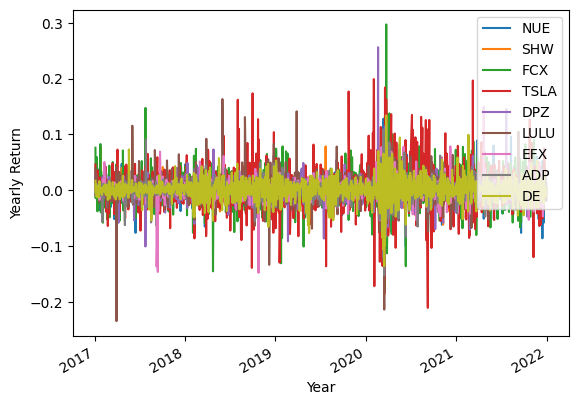

In [ ]:
#plot it
train_df.plot()
plt.xlabel('Year')
plt.ylabel('Yearly Return')
plt.show() # get rid of funky tex

##Covariance Matrix

In [ ]:
# creating covariance table on stock return dataframe
df_cov = train_df.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = train_df.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
           NUE       SHW       FCX      TSLA       DPZ      LULU       EFX  \
NUE   0.000498  0.000166  0.000435  0.000204  0.000062  0.000164  0.000131   
SHW   0.000166  0.000273  0.000220  0.000184  0.000094  0.000171  0.000134   
FCX   0.000435  0.000220  0.001037  0.000395  0.000078  0.000255  0.000196   
TSLA  0.000204  0.000184  0.000395  0.001446  0.000136  0.000273  0.000132   
DPZ   0.000062  0.000094  0.000078  0.000136  0.000378  0.000128  0.000057   
LULU  0.000164  0.000171  0.000255  0.000273  0.000128  0.000584  0.000134   
EFX   0.000131  0.000134  0.000196  0.000132  0.000057  0.000134  0.000354   
ADP   0.000185  0.000154  0.000230  0.000177  0.000073  0.000160  0.000159   
DE    0.000260  0.000165  0.000365  0.000181  0.000079  0.000167  0.000136   

           ADP        DE  
NUE   0.000185  0.000260  
SHW   0.000154  0.000165  
FCX   0.000230  0.000365  
TSLA  0.000177  0.000181  
DPZ   0.000073  0.000079  
LULU  0.000160  0.000167  
EFX   0.000

#Pyomo model more concise

In [ ]:
from pyomo.environ import *

# declare m
m = ConcreteModel()

# Define the number of stocks
num_stocks = len(chosen_stocks)
m.stocks = range(num_stocks)

# defining variables
m.proportions = Var(m.stocks, within=NonNegativeReals, bounds=(0, 1))

#Objective Function
obj_expr = 0
for i in m.stocks:
  obj_expr += m.proportions[i] * df_return[i]
m.objective = Objective(
                      expr = obj_expr,
                      sense = maximize)
# declare constraints
# 1. Sum of all proportions = 1
m.sum_proportions = Constraint(expr=sum(m.proportions[i] for i in m.stocks) == 1)

# 2. Minimum return should be at least a positive number
m.return_floor = Constraint(expr = m.objective >= 0)

# 2. Set Maximum risk
m.total_risk = Constraint(expr=sum(m.proportions[i] for i in m.stocks) >= 0.0)

# 3. Each stock cannot account for more than 50% of the portfolio
for i in m.stocks:
    m.add_component(f"limit_{i}", Constraint(expr=m.proportions[i] <= 0.5))

m.pprint()

1 Set Declarations
    proportions_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    9 : {0, 1, 2, 3, 4, 5, 6, 7, 8}

1 Var Declarations
    proportions : Size=9, Index=proportions_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :     1 : False :  True : NonNegativeReals
          1 :     0 :  None :     1 : False :  True : NonNegativeReals
          2 :     0 :  None :     1 : False :  True : NonNegativeReals
          3 :     0 :  None :     1 : False :  True : NonNegativeReals
          4 :     0 :  None :     1 : False :  True : NonNegativeReals
          5 :     0 :  None :     1 : False :  True : NonNegativeReals
          6 :     0 :  None :     1 : False :  True : NonNegativeReals
          7 :     0 :  None :     1 : False :  True : NonNegativeReals
          8 :     0 :  None :     1 : False :  True : NonNegativeReals

1 Objective Declarations
    objec

In [ ]:
# Function to calculate risk
def calc_risk():
    proportions = [m.proportions[i] for i in m.stocks]
    risk_matrix = []
    for index, col in enumerate(df_cov.columns):
        i = 0
        risk = []
        for row in df_cov[col]:
            risk.append(proportions[index] * row * proportions[i])
            i += 1
        risk_matrix.append(risk)
    risk_matrix = pd.DataFrame(risk_matrix)
    return risk_matrix.sum().sum()

#max risk shouldnt be more than 0.001
max_risk= 0.001
# defining risk limits
risk_limits = np.arange(0.00015, max_risk, 0.0000005)

In [ ]:
# updating risk constraint for each limit and then solving the problem
param_analysis = {}  # key=risk, value=stock allocations
returns = {}  # key=risk, value=return
for r in risk_limits:
  # Remove the existing total_risk constraint
  m.del_component(m.total_risk)
  # Add a new total_risk constraint
  m.total_risk = Constraint(expr=calc_risk() <= r)
  # run solver
  try:
    result = SolverFactory('ipopt', executable='/content/bin/ipopt').solve(m).write()
    # store our allocation proportions
    param_analysis[r] = [m.proportions[i]() for i in m.stocks]
    # store our returns
    returns[r] = m.objective()
  except:
    print('Infeasible')
    continue

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.05606508255004883
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.050333499908447266
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.054758310317993164
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.036728858947753906
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.0363924503326416
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.033307552337646484
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03472638130187988
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03906702995300293
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.053802490234375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of so

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.04404091835021973
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03718161582946777
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03489804267883301
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.040143728256225586
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.030733585357666016
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.0325322151184082
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.028955459594726562
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03507709503173828
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.04566597938537598
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of 

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.


Streaming output truncated to the last 5000 lines.
- Status: ok
  Message: Ipopt 3.13.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.020839691162109375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# -----------------------

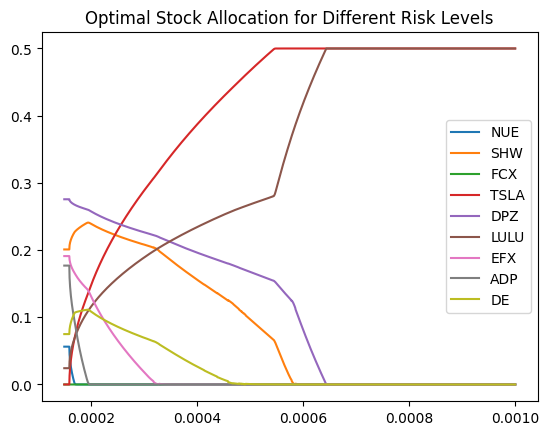

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = chosen_stocks
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()


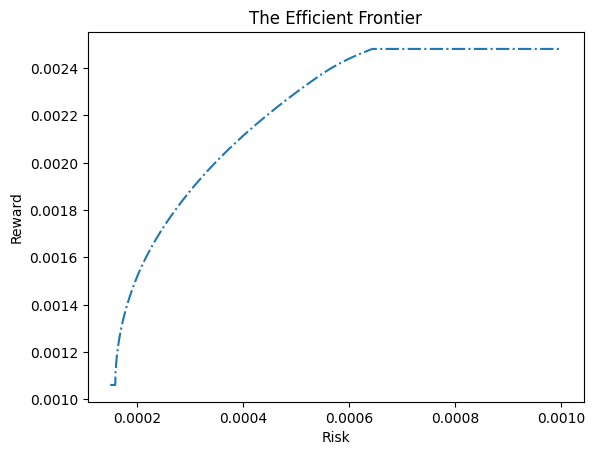

In [ ]:
# subset
risk = list(returns.keys())
reward = list(returns.values())

# Plot the values
plt.plot(risk, reward, '-.')
plt.title('The Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Reward')
plt.show()

##Select allocation consisting of 3 stocks

In [ ]:
#round up the allocations
param_analysis = round(param_analysis,4)
param_analysis

,NUE,SHW,FCX,TSLA,DPZ,LULU,EFX,ADP,DE
0.000150,0.0563,0.2009,0.0,0.0,0.2756,0.0242,0.1911,0.1769,0.075
0.000150,0.0563,0.2009,0.0,0.0,0.2756,0.0242,0.1911,0.1769,0.075
0.000151,0.0563,0.2009,0.0,0.0,0.2756,0.0242,0.1911,0.1769,0.075
0.000152,0.0563,0.2009,0.0,0.0,0.2756,0.0242,0.1911,0.1769,0.075
0.000152,0.0563,0.2009,0.0,0.0,0.2756,0.0242,0.1911,0.1769,0.075
...,...,...,...,...,...,...,...,...,...
0.000998,0.0000,0.0000,0.0,0.5,0.0000,0.5000,0.0000,0.0000,0.000
0.000999,0.0000,0.0000,0.0,0.5,0.0000,0.5000,0.0000,0.0000,0.000
0.000999,0.0000,0.0000,0.0,0.5,0.0000,0.5000,0.0000,0.0000,0.000
0.001000,0.0000,0.0000,0.0,0.5,0.0000,0.5000,0.0000,0.0000,0.000


In [ ]:
#get the allocations with exactly 3 stocks
result = param_analysis[(param_analysis != 0).sum(axis=1) == 3]

# Display the result
result

,NUE,SHW,FCX,TSLA,DPZ,LULU,EFX,ADP,DE
0.000602,0.0,0.0,0.0,0.5,0.0779,0.4220,0.0,0.0,0.0
0.000603,0.0,0.0,0.0,0.5,0.0769,0.4231,0.0,0.0,0.0
0.000603,0.0,0.0,0.0,0.5,0.0759,0.4241,0.0,0.0,0.0
0.000604,0.0,0.0,0.0,0.5,0.0748,0.4251,0.0,0.0,0.0
0.000604,0.0,0.0,0.0,0.5,0.0738,0.4261,0.0,0.0,0.0
0.000605,0.0,0.0,0.0,0.5,0.0728,0.4272,0.0,0.0,0.0
0.000605,0.0,0.0,0.0,0.5,0.0718,0.4282,0.0,0.0,0.0
0.000606,0.0,0.0,0.0,0.5,0.0707,0.4292,0.0,0.0,0.0
0.000606,0.0,0.0,0.0,0.5,0.0697,0.4302,0.0,0.0,0.0
0.000607,0.0,0.0,0.0,0.5,0.0687,0.4312,0.0,0.0,0.0


Let's pick the first allocation as our allocation for analysis

In [ ]:
# Get the first row
first_row = result.iloc[0]

# Subset non-zero columns
allocation = first_row[first_row != 0]

# Convert to DataFrame
allocation = allocation.to_dict()

In [ ]:
allocation

{'TSLA': 0.5, 'DPZ': 0.0779, 'LULU': 0.422}

# 4 - Analysis

##Setting up functions for the analysis

###🐱 Function 1: Get the data and cumulative returns

We opt to make a new function, adapted from the Momemtum Trading Function for better explainability for this section

In [ ]:
#A function to get cumulative returns for both Buy-Hold and Momentum Trading Systems
def analysis(tickers, short_window, long_window, start_date, end_date, output):
    cumulative_system = pd.DataFrame() #initiating a df to store daily cumulative returns for MT 8-21
    cumulative_buyhold = pd.DataFrame()#initiating a df to store daily cumulative returns for buy hold strategy
    ### GET THE DATA ###
    for ticker in tickers:
        stock = si.get_data(ticker,start_date,end_date,interval='1d')
        # Extract only the date part from the index
        stock.index = stock.index.date
        day = np.arange(1, len(stock) + 1)  # generate list of trading days
        stock['Day'] = day
        # Dropping columns I don't want to use
        stock.drop(columns=['adjclose', 'volume','ticker'], inplace = True)
        # Reorganizing the columns
        stock = stock[['Day', 'open', 'high', 'low', 'close']]
        # Renaming the columns
        stock.columns = ['Day', 'Open', 'High', 'Low', 'Close']

  ### CALCULATE RETURNS ###

        # Calculate moving averages without using shift
        stock['short_window'] = stock['Close'].rolling(short_window).mean().shift()
        stock['long_window'] = stock['Close'].rolling(long_window).mean().shift()

        # Calculate log returns
        stock['logClose'] = np.log(stock['Close'])
        stock['return'] = stock['logClose'].diff()

        # Fill NaN values in the 'return' column with 0
        stock['return'].fillna(0, inplace=True)

        # Generate buy/sell signals
        stock['invested'] = np.where(stock['short_window'] > stock['long_window'], 1, 0)
        stock['signal'] = stock['invested'].diff()

        # Calculate system returns
        stock['system_return'] = stock['invested'] * stock['return']

        # Calculate cumulative returns for both strategies
        stock['buy_hold_cumulative'] = np.exp(stock['return']).cumprod()
        stock['system_cumulative'] = np.exp(stock['system_return']).cumprod()

        # add the cumulative results in the dataset
        cumulative_system[ticker] = stock['system_cumulative']
        cumulative_buyhold[ticker] = stock['buy_hold_cumulative']

    ##DECIDE WHICH OUTPUT TO RETURN##

    # Create and return results DataFrame based on the specified output
    if output == 'cumulative_system':
        return cumulative_system
    elif output == 'cumulative_buyhold':
        return cumulative_buyhold
    else:
        raise ValueError("Invalid output parameter. Choose from 'cumulative_system' or 'cumulative_buyhold'.")

### 🌵 Function 2: Calculate daily invesment values

In [ ]:
def calculate_investment_values(cumulative_returns, initial_investment, allocation):
    # Copy the cumulative_returns DataFrame
    investment_df = cumulative_returns.copy()

    # Convert cumulative returns to investment amounts
    for column in cumulative_returns.columns:
        #assign investment and allocation here
        investment_df[column] = round(initial_investment * cumulative_returns[column] * allocation[column], 2)

    # Aggregate the values for each day to get the total portfolio value
    investment_df['Total Portfolio Value'] = round(investment_df.sum(axis=1), 2) #round to 2 decimals

    # Set the index to datetime
    investment_df.index = pd.to_datetime(investment_df.index)

    # Extract the first observation for each month
    monthly_df = investment_df.groupby([investment_df.index.year, investment_df.index.month]).head(1)

    return monthly_df


##Buy-and-hold strategy for the MPT portfolio

In [ ]:
#declare the stocks chosen again
chosen_tickers = allocation.keys()

In [ ]:
#Get the cumulative returns for the Buy and Hold Porfolioo
mpt_buyhold= analysis(tickers= chosen_tickers,
                      short_window =8 ,
                      long_window = 21,
                      start_date ='2022-01-01' ,
                      end_date= '2022-12-31',
                      output= 'cumulative_buyhold')
mpt_buyhold

,TSLA,DPZ,LULU
2022-01-03,1.000000,1.000000,1.000000
2022-01-04,0.958167,0.967572,0.982609
2022-01-05,0.906933,0.940910,0.935287
2022-01-06,0.887413,0.947923,0.951517
2022-01-07,0.855957,0.919038,0.916529
...,...,...,...
2022-12-23,0.307931,0.638119,0.803850
2022-12-27,0.272800,0.640613,0.812881
2022-12-28,0.281827,0.622555,0.797193
2022-12-29,0.304606,0.632298,0.817473


In [ ]:
#amount of money invested in each stock of your portfolio on the first day of each month
mpt_BH_monthly = calculate_investment_values(mpt_buyhold,
                                             initial_investment= 100000,
                                             allocation=allocation)
mpt_BH_monthly

,TSLA,DPZ,LULU,Total Portfolio Value
2022-01-03,50000.00,7790.00,42200.00,99990.00
2022-02-01,38809.20,6453.41,37556.00,82818.61
2022-03-01,36022.02,6086.03,34318.80,76426.85
2022-04-01,45199.54,5592.77,40009.21,90801.52
2022-05-02,37629.40,4944.19,39290.56,81864.15
2022-06-01,30854.41,5081.20,31572.69,67508.30
2022-07-01,28413.13,5683.31,28678.49,62774.93
2022-08-01,37166.40,5493.36,33755.86,76415.62
2022-09-01,34651.35,5232.85,32061.59,71945.79
2022-10-03,30305.56,4455.85,31805.71,66567.12


##8-21 Momentum trading on S&P 500 index (^GSPC)

In this investment, you should apply the 8-21 Momentum Trading strategy to the S&P 500 index (^GSPC), as it was a stock. Create a table that shows the value of each position in your portfolio on the first day of each month (i.e., how much money is currently allocated to each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022. When computing the moving averages, you must consider the last days of 2021; therefore, in principle, your model should be able to buy the stocks on Jan 1, 2022 (deduction of 3 points if the last days of 2021 are not used).  


In [ ]:
#Declare ticker name
sp_ticker = ['^GSPC']
#Declare allocation of 100%
sp_allocation = {'^GSPC': 1}

In [ ]:
#get the raw cumulative returns for Momentum Trading strategy
sp_system = analysis(sp_ticker,
                    short_window =8 ,
                    long_window = 21,
                    start_date ='2021-12-28' , #include the last couple days of 2021
                    end_date= '2022-12-31',
                    output='cumulative_system')
sp_system

,^GSPC
2021-12-28,1.000000
2021-12-29,1.000000
2021-12-30,1.000000
2021-12-31,1.000000
2022-01-03,1.000000
...,...
2022-12-23,0.924682
2022-12-27,0.924682
2022-12-28,0.924682
2022-12-29,0.924682


In [ ]:
#amount of money invested in each stock of your portfolio on the first day of each month
sp_system_monthly = calculate_investment_values(sp_system,
                                                initial_investment= 100000,
                                                allocation= sp_allocation)
sp_system_monthly

,^GSPC,Total Portfolio Value
2021-12-28,100000.00,100000.00
2022-01-03,100000.00,100000.00
2022-02-01,100000.00,100000.00
2022-03-01,94804.87,94804.87
2022-04-01,96604.40,96604.40
2022-05-02,94494.81,94494.81
2022-06-01,94494.81,94494.81
2022-07-01,84510.10,84510.10
2022-08-01,89261.84,89261.84
2022-09-01,87354.21,87354.21


## Buy-and-hold strategy for the S&P 500 index (^GSPC)



Create a table that shows the amount of money invested in ^GSPC on the first day of each month (i.e., how much money is currently invested in each stock) as well as the aggregate value of the entire portfolio from Jan 1, 2022 (when you would have done your allocation), February 1, 2022 …, through December 1, 2022 (when we imagine you sold your stocks).


In [ ]:
#get the raw cumulative returns for buy and hold strategy
sp_buyhold= analysis(sp_ticker,
                     short_window =8 ,
                      long_window = 21,
                      start_date ='2022-01-01' ,
                      end_date= '2022-12-31',
                      output= 'cumulative_buyhold')

In [ ]:
#amount of money invested in each stock of your portfolio on the first day of each month
sp_BH_monthly= calculate_investment_values(sp_buyhold,
                                           initial_investment= 100000,
                                           allocation = sp_allocation)
sp_BH_monthly

,^GSPC,Total Portfolio Value
2022-01-03,100000.00,100000.00
2022-02-01,94787.51,94787.51
2022-03-01,89778.08,89778.08
2022-04-01,94773.33,94773.33
2022-05-02,86632.50,86632.50
2022-06-01,85503.57,85503.57
2022-07-01,79751.53,79751.53
2022-08-01,85866.33,85866.33
2022-09-01,82701.98,82701.98
2022-10-03,76688.92,76688.92


##Make a plot

Show the performance of each of the three strategies above in a single plot. Using the plot, compare and analyze the results obtained by the three strategies.  


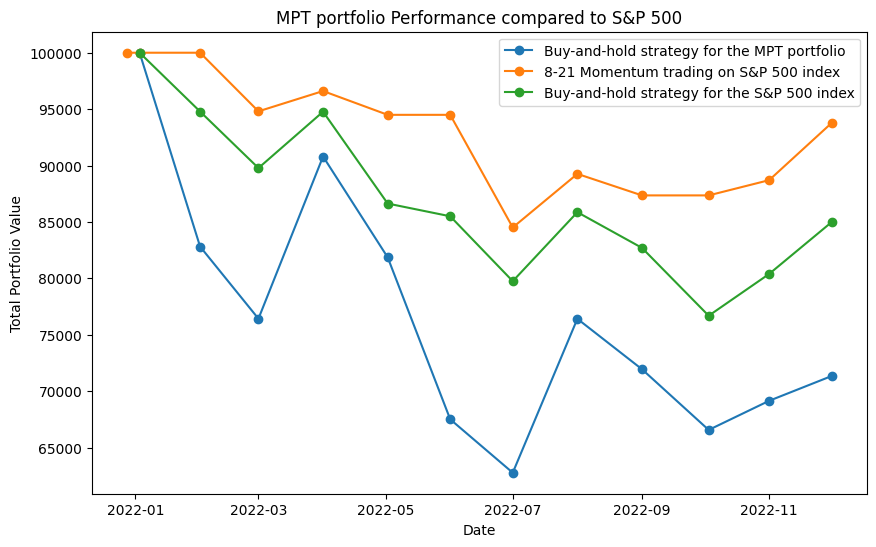

In [ ]:
# Plot Total Portfolio Value for each DataFrame
plt.figure(figsize=(10, 6))
plt.plot(mpt_BH_monthly.index, mpt_BH_monthly['Total Portfolio Value'], label='Buy-and-hold strategy for the MPT portfolio', linestyle='-', marker='o')
plt.plot(sp_system_monthly.index, sp_system_monthly['Total Portfolio Value'], label='8-21 Momentum trading on S&P 500 index', linestyle='-', marker='o')
plt.plot(sp_BH_monthly.index, sp_BH_monthly['Total Portfolio Value'], label='Buy-and-hold strategy for the S&P 500 index', linestyle='-', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Portfolio Value')
plt.title('MPT portfolio Performance compared to S&P 500')

# Add legend
plt.legend()

# Display the plot
plt.show()

## Table of all results

In [ ]:
#Function to clean up the dataset to create a nice table for system monthly
final_sp_system_monthly = sp_system_monthly
final_sp_system_monthly = final_sp_system_monthly.drop('Total Portfolio Value', axis=1)
final_sp_system_monthly = final_sp_system_monthly.rename(columns={'^GSPC': '^GSPC Momentum Trading'})

#Function to clean up the dataset to create a nice table for Buy and hold
final_sp_BH_monthly = sp_BH_monthly
final_sp_BH_monthly = final_sp_BH_monthly.rename(columns={'^GSPC': '^GSPC Buy & Hold'})
final_sp_BH_monthly = final_sp_BH_monthly.drop('Total Portfolio Value', axis=1)


In [ ]:
#Creating a nice tbale of all results from all systems
result_table = pd.concat([mpt_BH_monthly, final_sp_system_monthly, final_sp_BH_monthly], axis=1)
result_table = result_table.reset_index(drop=True)
result_table = result_table.dropna()
result_table

,TSLA,DPZ,LULU,Total Portfolio Value,^GSPC Momentum Trading,^GSPC Buy & Hold
1,50000.00,7790.00,42200.00,99990.00,100000.00,100000.00
2,38809.20,6453.41,37556.00,82818.61,100000.00,94787.51
3,36022.02,6086.03,34318.80,76426.85,94804.87,89778.08
4,45199.54,5592.77,40009.21,90801.52,96604.40,94773.33
5,37629.40,4944.19,39290.56,81864.15,94494.81,86632.50
6,30854.41,5081.20,31572.69,67508.30,94494.81,85503.57
7,28413.13,5683.31,28678.49,62774.93,84510.10,79751.53
8,37166.40,5493.36,33755.86,76415.62,89261.84,85866.33
9,34651.35,5232.85,32061.59,71945.79,87354.21,82701.98
10,30305.56,4455.85,31805.71,66567.12,87354.21,76688.92


# Conclusion

* Looking at the Eficient Frontier plot, we find that at our risk level chosen for the 3 stock portfolio, we have already reached the plateau of the graph. Ideally,we would prefer to identify an inflection point with a better balance of risk and reward tradeoff, e.g at Risk level of ~0.00057
* We gained a better understanding of the relationship between covariance and risk, recognizing that low covariance between assets in a portfolio enhances diversification and reduces overall risk, whereas high covariance increases portfolio volatility and risk.
* The MPT portofio lost ~28% of its value in 2022. While we witness similar trends in all 3 portfolios, the MPT portfolio underperforms compared to the results of both strategies for S&P 500
* Taking into account the economic events that unfolded in 2022, such as global supply chain disruptions, inflationary pressures, and geopolitical uncertainties, it makes sense that we see such downward trends in the portfolio value
* Our basic momentum trading is effective, but it is heavily relient on how well the market is doing. Instead of just analyzing momentum we should have a model that takes into account global evenets and companies outlooks
* In the real world, it is more effective to buy stocks using a 401k if a company matches, since you allocat money per pay check and in most cases a company matches a certain % that is invested. But if you can create a model that takes more then just moving averages into account you can get lucky and get very rich using day trading! (This is not financial advice and people should be very carefull with investing their lives savings)
